# Init

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi
import scipy as sp

import mie_aniso

In [1]:
%matplotlib notebook

In [2]:
def I_trans_tot(alpha_b, L, Ibe = 1):
    """
    alpha_b: backward extinction coefficient
    calculates total transmission with backward extinction
    """
    return Ibe/(np.exp(-2*alpha_b*L) + 1)*2*np.exp(-2*alpha_b*L)
    
def I_trans_spc(alpha_b, alpha_f, L, Ibe = 1):
    return Ibe*np.exp(-L*(alpha_b+alpha_f))

def I_trans_dif(alpha_b, alpha_f, L, Ibe = 1):
    return I_trans_tot(alpha_b, L, Ibe) - I_trans_spc(alpha_b, alpha_f, L, Ibe)

def haze(alpha_b, alpha_f, L):
    return I_trans_dif(alpha_b, alpha_f, L)/I_trans_tot(alpha_b, L)

# Single parameter

In [9]:
r0 = 10 # radius in micron
wl = 0.6328 # wavelength in micron
LL = 100 # sample thickness in micron

n_r = 1.501 # radial refractive index
n_t = 1.499 # tangential refractive index
n_bg = 1.5 # background refractive index

f_V = 0.4 # volume fraction (sum v_i)/V_container
n0 = f_V/(4./3*r0**3*pi) # nucleus density N/V [1/um^3]

# create single mie object
sm = mie_aniso.single_mie(r0, wl, n_r**2, n_t**2, n_bg**2)

# calculate forward and backward cross section
(C_f, C_b) = sm.csca_fb()

# total transmission
print("total transmission:", I_trans_tot(C_b*n0, LL))
print("diffuse transmission:", I_trans_dif(C_b*n0, C_f*n0, LL))
print("specular transmission:", I_trans_spc(C_b*n0, C_f*n0, LL))
print("haze:", haze(C_b*n0, C_f*n0, LL))

total transmission: 0.9999993375005948
diffuse transmission: 0.035734030487476476
specular transmission: 0.9642653070131183
haze: 0.035734054161266106


# Radius dependence

In [13]:
radius = np.linspace(1,50, num = 10) # um
wl = 0.6328 # um
LL = 1000 # um

n_bg = 1.5
dn = 0.002
n_r = n_bg+dn*0.5
n_t = n_bg-dn*0.5
f_V = 0.4 # volume fraction (sum v_i)/V_container
n0 = f_V/(4./3*radius**3*pi)

csca = []
for ir, r0 in enumerate(radius):
    sm = mie_aniso.single_mie(r0, wl, n_r**2, n_t**2, n_bg**2)
    csca.append(sm.csca_fb())
    
csca = np.array(csca)

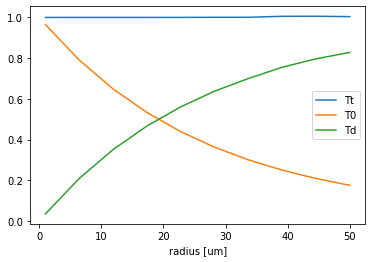

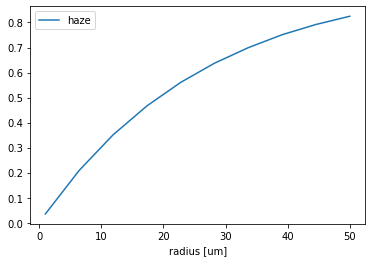

In [16]:
plt.figure()
plt.plot(radius,I_trans_tot(csca[:,1]*n0, LL), label='Tt')
plt.plot(radius,I_trans_spc(csca[:,1]*n0, csca[:,0]*n0, LL), label='T0')
plt.plot(radius,I_trans_dif(csca[:,1]*n0, csca[:,0]*n0, LL), label='Td')
plt.legend()
plt.xlabel('radius [um]')

plt.figure()
plt.plot(radius, haze(csca[:,1]*n0, csca[:,0]*n0, LL), label = 'haze')
plt.xlabel('radius [um]')
plt.legend()

# Haze vs wavelength at different thicknesses

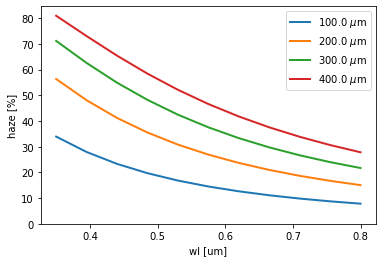

In [19]:
# Haze vs wavelength at different thicknesses
# parameters
r0 = 16
wght = 1
wls = np.linspace(0.35,0.8,num=11)
n_bg = 1.5
dn = 0.003
n_r = n_bg+dn*0.5
n_t = n_bg-dn*0.5
Ds = [100., 200., 300., 400.]
f_V = 0.4 # volume fraction (sum v_i)/V_container
n0 = f_V/(4./3*r0**3*pi)

hh = []
for wl in wls:
    sm = mie_aniso.single_mie(r0, wl, n_r**2, n_t**2, n_bg**2)
    csca_f, csca_b = sm.csca_fb()
    hh.append(haze(csca_b*n0, csca_f*n0, np.array(Ds)))

hh = np.array(hh)

plt.figure()
plt.plot(wls,hh[:,0]*100.,lw = 2,label= str(Ds[0])+' $\mu$m')
plt.plot(wls,hh[:,1]*100.,lw = 2,label= str(Ds[1])+' $\mu$m')
plt.plot(wls,hh[:,2]*100.,lw = 2,label= str(Ds[2])+' $\mu$m')
plt.plot(wls,hh[:,3]*100.,lw = 2,label= str(Ds[3])+' $\mu$m')

plt.ylim(bottom = 0)
plt.xlabel('wl [um]')
plt.ylabel('haze [%]')
plt.legend(loc = 0)

# np.savetxt('wl_dep_at_thickness.txt',np.column_stack((wls,(1-np.array(T0)[:,0])*100.,
#    (1-np.array(T0)[:,1])*100.,(1-np.array(T0)[:,2])*100.,(1-np.array(T0)[:,3])*100.)),delimiter='\t', fmt='%.3f',
#           header='haze as function of wavelength with different thicknesses in columns\nradius = 16um, n_bg = 1.5, dn = 0.003, f_V = 40 %\n'+
#           'wl [um]\t100 um\t200 um\t300 um\t400 um')

# Haze vs dn at different radii

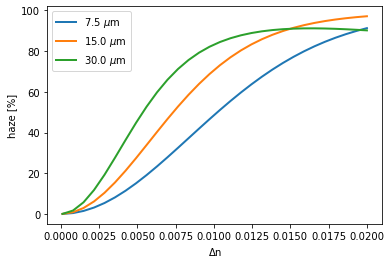

In [18]:
# dn dependence
# parameters
r0s = [7.5, 15., 30.]
wght = 1
wl = 0.6328
n_bg = 1.5
D = 100.
f_V = 0.4 # volume fraction (sum v_i)/V_container
n0s = f_V/(4./3*np.array(r0s)**3*pi)


dns = np.linspace(0.0001,0.02,num=30)
hh = []
for it, r0 in enumerate(r0s):
    hh.append([])
    for dn in dns:
        n_r = n_bg+dn*0.5
        n_t = n_bg-dn*0.5
        
        sm = mie_aniso.single_mie(r0, wl, n_r**2, n_t**2, n_bg**2)
        csca_f, csca_b = sm.csca_fb()
        hh[-1].append(haze(csca_b*n0s[it], csca_f*n0s[it], D))
#         rt = RT2.RT2(wl, r0, 1, n_r, n_t, n_bg, n0s[it])
#         T0[-1].append(np.exp(-rt.alpha*D))
hh = np.array(hh)

plt.figure()
plt.plot(dns,hh[0,:]*100.,lw = 2,label= str(r0s[0])+' $\mu$m')
plt.plot(dns,hh[1,:]*100.,lw = 2,label= str(r0s[1])+' $\mu$m')
plt.plot(dns,hh[2,:]*100.,lw = 2,label= str(r0s[2])+' $\mu$m')
# plt.title('dn-dependence, R = '+str(r0)+' um, wl = 632.8 nm,\n'+
#           'n_bg = 1.5, f_V = '+str(f_V)+', D = '+str(D)+' um')
#plt.xlim((0,0.02))
plt.xlabel('$\Delta$n')
plt.ylabel('haze [%]')
plt.legend(loc = 0)

# np.savetxt('dn_dep_at_radius.txt',np.column_stack((dns,(1-np.array(T0)[0,:])*100.,
#    (1-np.array(T0)[1,:])*100.,(1-np.array(T0)[2,:])*100.)),delimiter='\t', fmt=('%.3e','%.3f','%.3f','%.3f'),
#           header='haze as function of dn with different radii in columns\nwl = 0.6328 um, D = 100um, n_bg = 1.5, f_V = 40 %\n'+
#           'dn\t7.5 um\t15 um\t30 um')

# Haze vs radius at different dn-s

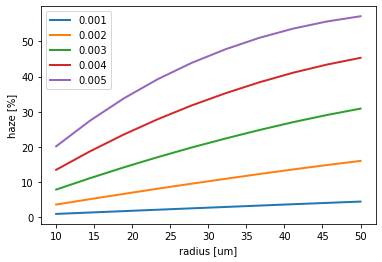

In [21]:
# size dependence
# parameters
r0s = np.linspace(10,50,num=10)
wght = 1
wl = 0.6328
n_bg = 1.5
f_V = 0.4 # volume fraction (sum v_i)/V_container
n0s = f_V/(4./3*np.array(r0s)**3*pi)
D = 100.

dns = [0.001,0.002, 0.003, 0.004, 0.005]
hh = []
for dn in dns:
    hh.append([])
    n_r = n_bg+dn*0.5
    n_t = n_bg-dn*0.5
    for it, r0 in enumerate(r0s):
        sm = mie_aniso.single_mie(r0, wl, n_r**2, n_t**2, n_bg**2)
        csca_f, csca_b = sm.csca_fb()
        hh[-1].append(haze(csca_b*n0s[it], csca_f*n0s[it], D))
        
#         rt = RT2.RT2(wl, r0, 1, n_r, n_t, n_bg, n0s[it])
#         T0[-1].append(np.exp(-rt.alpha*D))

hh = np.array(hh)

plt.figure()
plt.plot(r0s,hh[0,:]*100.,lw = 2,label= str(dns[0]))
plt.plot(r0s,hh[1,:]*100.,lw = 2,label= str(dns[1]))
plt.plot(r0s,hh[2,:]*100.,lw = 2,label= str(dns[2]))
plt.plot(r0s,hh[3,:]*100.,lw = 2,label= str(dns[3]))
plt.plot(r0s,hh[4,:]*100.,lw = 2,label= str(dns[4]))
# plt.title('dn-dependence, R = '+str(r0)+' um, wl = 632.8 nm,\n'+
#           'n_bg = 1.5, f_V = '+str(f_V)+', D = '+str(D)+' um')
#plt.xlim((0,0.02))
plt.xlabel('radius [um]')
plt.ylabel('haze [%]')
plt.legend(loc = 0)

# np.savetxt('size_dep_at_dn.txt',np.column_stack((r0s,(1-np.array(T0)[0,:])*100.,
#    (1-np.array(T0)[1,:])*100.,(1-np.array(T0)[2,:])*100.,(1-np.array(T0)[3,:])*100.,(1-np.array(T0)[4,:])*100.)),
#            delimiter='\t', fmt='%.3f',
#            header='haze as function of size with different dn in columns\n'+
#            'wl = 0.6328 um, D = 100um, n_bg = 1.5, f_V = 40 %\n'+
#            'r [um]\t0.001\t0.002\t0.003\t0.004\t0.005')

# Haze vs thickness at different radii + measurement data

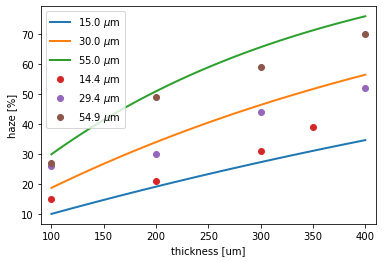

In [22]:
# size dependence
# parameters
r0 = 15.
r1 = 30.
r2 = 55.
wght = 1
wl = 0.6328
n_bg = 1.5
f_V = 0.4 # volume fraction (sum v_i)/V_container
n0 = f_V/(4./3*r0**3*pi)
n1 = f_V/(4./3*r1**3*pi)
n2 = f_V/(4./3*r2**3*pi)
dn = 0.0028

n_r = n_bg-dn*0.5
n_t = n_bg+dn*0.5
# rt0 = RT2.RT2(wl, r0, 1, n_r, n_t, n_bg, n0)
# rt1 = RT2.RT2(wl, r1, 1, n_r, n_t, n_bg, n1)
# rt2 = RT2.RT2(wl, r2, 1, n_r, n_t, n_bg, n2)

sm1 = mie_aniso.single_mie(r0, wl, n_r**2, n_t**2, n_bg**2)
sm2 = mie_aniso.single_mie(r1, wl, n_r**2, n_t**2, n_bg**2)
sm3 = mie_aniso.single_mie(r2, wl, n_r**2, n_t**2, n_bg**2)

csca_f1, csca_b1 = sm1.csca_fb()
csca_f2, csca_b2 = sm2.csca_fb()
csca_f3, csca_b3 = sm3.csca_fb()

DD = np.linspace(100,400)
h0 = haze(csca_b1*n0, csca_f1*n0, DD)
h1 = haze(csca_b2*n1, csca_f2*n1, DD)
h2 = haze(csca_b3*n2, csca_f3*n2, DD)

plt.figure()
plt.plot(DD,h0*100.,lw = 2,label= str(r0)+' $\mu$m')
plt.plot(DD,h1*100.,lw = 2,label= str(r1)+' $\mu$m')
plt.plot(DD,h2*100.,lw = 2,label= str(r2)+' $\mu$m')
# plt.title('dn-dependence, R = '+str(r0)+' um, wl = 632.8 nm,\n'+
#           'n_bg = 1.5, f_V = '+str(f_V)+', D = '+str(D)+' um')
plt.xlim((90,410))

plt.plot([100,200,300,350],[15,21,31,39],'o',label= '14.4 $\mu$m')
plt.plot([100,200,300,400],[26,30,44,52],'o',label= '29.4 $\mu$m')
plt.plot([100,200,300,400],[27,49,59,70],'o',label= '54.9 $\mu$m')
plt.xlabel('thickness [um]')
plt.ylabel('haze [%]')
plt.legend(loc = 0)

# np.savetxt('thickness_dep_at_size.txt',np.column_stack((DD,(1-np.array(T0))*100.,
#    (1-np.array(T1))*100.,(1-np.array(T2))*100.)),
#            delimiter='\t', fmt='%.3f',
#            header='haze as function of thickness with different sph size in columns\n'+
#            'for comparison with measurements\n'+
#            'wl = 0.6328 um, D = 100um, n_bg = 1.5, dn = 0.0028, f_V = 40 %\n'+
#            'D [um]\t15 um\t30 um\t55 um')
